<a href="https://colab.research.google.com/github/kkiprono4/KNN-and-Naive-Bayes-Classifier/blob/main/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question
## Specifying the Data Analytic Question
We are required to predict whether a passenger survived or not in the Titanic dataset

## Defining the Metric for Success
To be able to create an algorithm that can help us classify the passengers in terms of survival in the Titanic dataset with an accuracy of 75% and above.

## Understanding the context
The RMS Titanic was known as the unsinkable ship and was the largest, most luxurious passenger ship of its time. Sadly, the Titanic sank on April 15, 1912, killing over 1500 people while just 705 survived.

The following are the dataset column descriptions:

pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survived - Survival (0 = No, 1 = Yes)

name - Name of the passenger

sex - Gender/sex

age - Age of the passenger

## Recording the Experimental Design
Import the relevant libraries that we will use in our analysis

Define the appropriateness of the available data with regards to the project

Find and deal with outliers and missing data within the dataset.

Perform univariate and bivariate analysis while recording our observations.

Implement the solution by using the KNN classifier algorithm to predict whether a passenger survived in the Titanic crash

Challenge the solution by giving insights on how we can optimize the model to give us a better performance

Provide recommendations based on the performance of our models

## Data Relevance
The data is relevant since it has all the features that will help us know if a passanger survived or not

Below are the columns

pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survived - Survival (0 = No, 1 = Yes)

name - Name of the passenger

sex - Gender/sex

age - Age of the passenger

sibsp - Number of siblings/spouses aboard

parch - Number of parents/children aboard

fare - Passenger fare

embarked - Port of embarkation (Cherboug, Queenstown, Southampton)

sibsp - Number of siblings/spouses aboard

parch - Number of parents/children aboard

fare - Passenger fare

embarked - Port of embarkation (Cherboug, Queenstown, Southampton)

In [32]:
#Numpy is a library for python that supports multidimensional arrays and matrices as well as mathematical functions
import numpy as np
#Pandas is Python library used for data manipulation and data analysis
import pandas as pd
#Matplotlib is a python library utilised in plotting and its numerical capabilities
import matplotlib.pyplot as plt
#Seaborn is a Python data visualisation library basrd on matplotlib.
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [33]:
#loading datasets
train = pd.read_csv('/content/train (5).csv')
test = pd.read_csv('/content/test (1).csv')

In [34]:
# Viewing the first  five observations of the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# Viewing the first five observations of the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
#checking shape of the train dataset
train.shape

(891, 12)

891 records 12 variables

In [37]:
#checking shape of the test dataset
test.shape

(418, 11)

418 records 11 variables

In [38]:
#statistical summary
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [39]:
#statistical summary
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
# checking for unique values 

cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cols:
  print(col)
  print(train[col].unique())
  print('\n')

Pclass
[3 1 2]


Sex
['male' 'female']


SibSp
[1 0 3 4 2 5 8]


Parch
[0 1 2 5 3 4 6]


Embarked
['S' 'C' 'Q' nan]




In [41]:
# checking for unique values 

cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cols:
  print(col)
  print(test[col].unique())
  print('\n')

Pclass
[3 2 1]


Sex
['male' 'female']


SibSp
[0 1 2 3 4 5 8]


Parch
[0 1 3 2 4 6 5 9]


Embarked
['Q' 'S' 'C']




In [42]:
# checking the mumber of missing values by column and sorting for the smallest

Total = train.isnull().sum().sort_values(ascending=False)

# Calculating percentages
percent_1 = train.isnull().sum()/train.isnull().count()*100

# rounding off to one decimal point
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# creating a dataframe to show the values
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled by mode.

It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values.

The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [43]:
# checking the mumber of missing values by column and sorting for the smallest

Total = test.isnull().sum().sort_values(ascending=False)

# Calculating percentages
percent_1 = test.isnull().sum()/train.isnull().count()*100

# rounding off to one decimal point
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# creating a dataframe to show the values
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,327.0,36.7
Age,86.0,9.7
Fare,1.0,0.1
PassengerId,0.0,0.0
Pclass,0.0,0.0
Name,0.0,0.0
Sex,0.0,0.0
SibSp,0.0,0.0
Parch,0.0,0.0
Ticket,0.0,0.0


The fare feature has only 1 missing value, which can easily be dropped.

The ‘Age’ feature which has 86 missing values can be easily replaced.

The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 36 % of it are missing.

In [44]:
#we shall use the duplicated function.
train.duplicated().sum()
#We do not have duplicated values in the titanic train dataset

0

In [45]:
test.duplicated().sum()
#We do not have duplicated values in the titanic test dataset

0

In [46]:
#columns such as passenger ID, Name  and Ticket are not very useful to  the Algorithm and 
#may reduce our accuracy and hence will be dropped.

train = train.drop(columns =['PassengerId','Name','Ticket','Cabin'])

test = test.drop(columns =['PassengerId','Name','Ticket','Cabin'])

In [47]:
#We will inspect the shape to see the change.
print(test.shape)
print(train.shape)

(418, 7)
(891, 8)


In [48]:
#We have discovered we still have null values in Titanic train Dataset, Embaarked Column(variable)

print(train['Embarked'].unique())

print(test['Embarked'].unique())

['S' 'C' 'Q' nan]
['Q' 'S' 'C']


In [49]:
#We will check for number of columns with nan in embarked
len(train.loc[(train['Embarked'] =='nan')])

0

In [50]:
#For test
test['Age']=test['Age'].fillna((test['Age'].mean))

#For train
train['Age']=train['Age'].fillna((train['Age'].mean))

In [51]:
#checking the changes
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [52]:
#dropping the 1 missing value in fare column
test=test.dropna()

In [53]:
#checking the changes in the train dataset
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [54]:
#dropping the 2 embarked column missing values
train = train.dropna()

In [55]:
#checking the changes in the train dataset
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [56]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [57]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [58]:
# Encoding the categories

ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [59]:
gender = {"male":0, "female":1}

data = [train, test]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(gender)

In [60]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [61]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


# Exploratory Data Analysis

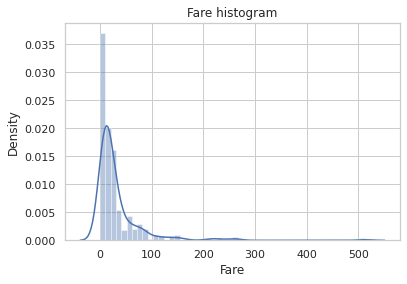

In [62]:
# Fare column histogram

sns.distplot(train.Fare)
figsize = (10,5)
plt.title('Fare histogram')
plt.show()

In [63]:
percentages_survived_died =train['Survived'].value_counts()* 100/ len(train)
percentages_survived_died

#This means 61% of the people Died

0    61.754781
1    38.245219
Name: Survived, dtype: float64

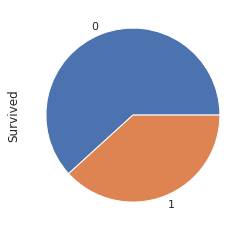

In [64]:
#This is a pie chart representation of the people who survived and died
%matplotlib inline

alpha_color = 0.5
percentages_survived_died.plot(kind = 'pie')
plt.show()

In [65]:
pclass_train = train['Pclass'].value_counts()* 100/ len(train)
pclass_train

3    55.230596
1    24.071991
2    20.697413
Name: Pclass, dtype: float64

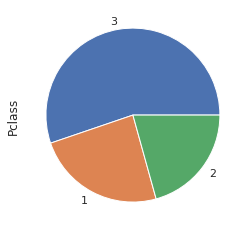

In [66]:
pclass_train.plot(kind = 'pie')
plt.show()

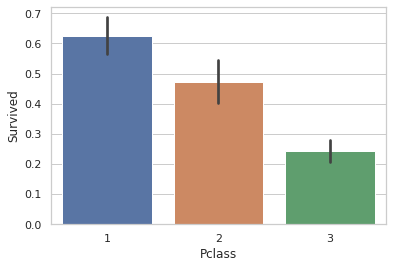

In [67]:
# Using a bar chart from seaborn
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='Pclass', y='Survived', data=train)

It is clear that people from the First class had higher chances of survival.
Pclass is therefore an important feature to predict survival

In [68]:
gender_train = train['Sex'].value_counts()* 100/ len(train)
gender_train

0    64.904387
1    35.095613
Name: Sex, dtype: float64

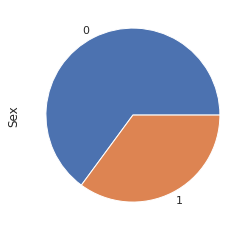

In [69]:
gender_train.plot(kind ='pie')
plt.show()

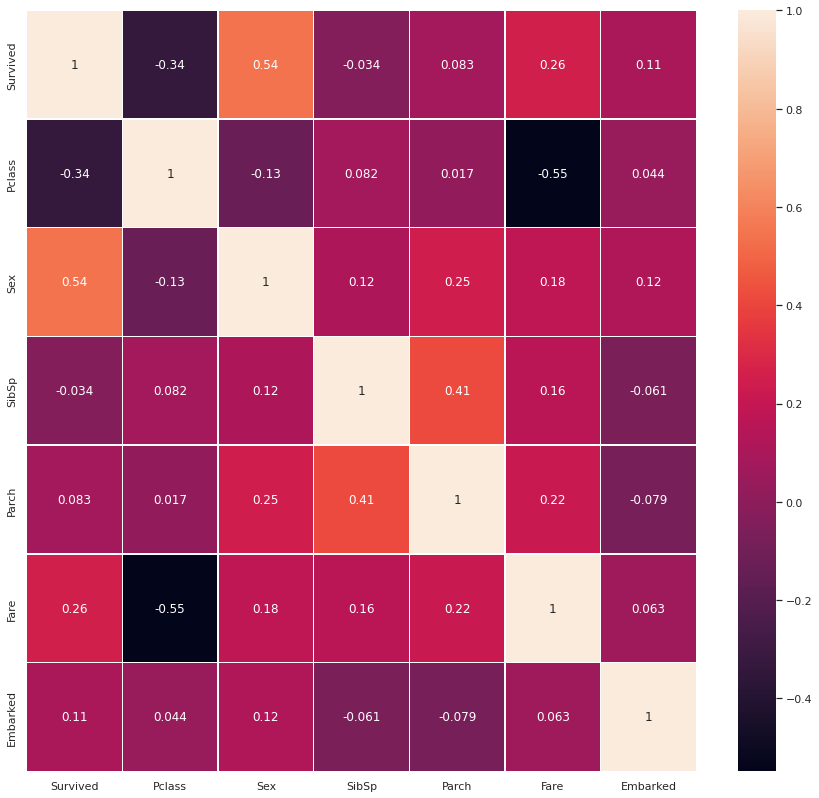

In [70]:
# Create a correlation matrix
corrMatrix = train.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(15,14)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

# K-Nearest Neighbours Classifier

In [71]:
 #train['Age'].astype(str).astype(int)

In [72]:

train = train.drop(columns =['Age'])

test = test.drop(columns =['Age'])

In [73]:
# Splitting the data into test and train sets

X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test.copy()


# Instantiating our model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 

# Training our model
knn.fit(X_train,y_train) 

# Making Predictions using our model 

y_pred = knn.predict(X_test) 


# Evaluating our model using accuracy score
acc_knn = round(knn.score(X_train, y_train) * 100, 1)
acc_knn

83.1

The train set yields 83.1% accuracy without splitting it further.

## Splitting the train set into 80, 20 sets as instructed.

In [74]:
# Splitting the data into features and target variable

X = train.drop('Survived', axis = 1)
y = train.Survived


# Splitting the data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)


# Instantiating our model
# Using default  k= 5
knc = KNeighborsClassifier()


# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)


78.08988764044943


The 80,20 split model yielded 78% accuracy.

## Splitting the train set into 70, 30 sets as instructed.

In [75]:
# Splitting the data into features and target variable

X = train.drop('Survived', axis = 1)
y = train.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)


# Fitting the KNN classifier to our train data set
model3 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model3.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred)*100)

78.65168539325843


The 70,30 split model yielded 78.65% accuracy.

## Splitting the train set into 60, 40 sets as instructed.

In [76]:
# Splitting the data into features and target variable

X = train.drop('Survived', axis = 1)
y = train.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 10)

# Instantiating our model
knc = KNeighborsClassifier(n_neighbors = 3)

# Fitting the KNN classifier to our train data set
model3 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model3.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred)*100)

75.56179775280899


The 60,40 split model yielded 75.56% accuracy.

# Optimization Techniques for KNN

In [77]:
# Splitting the data into features and target variable

X = train.drop('Survived', axis = 1)
y = train.Survived


# Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

# scaling our Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
        

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = 10,
                       n_jobs = -1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

## Using the Best parameters to assess the best split KNN model (80,20)

In [78]:
# Splitting the data into features and target variable

X = train.drop('Survived', axis = 1)
y = train.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)


# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Instantiating our model
# Using our best parameters using random search
knc = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 7, weights = 'uniform')

# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred)*100)

83.14606741573034


There is great improvement in our tuned model with accuracy of 83%

# Recommendations
From the analysis: Tuning and Optimizing the KNN model is highly recommended to improve the performance of the model.